In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, time
from sklearn.cluster import DBSCAN
from sklearn import metrics

# Analiza skupień na danych przestrzennych

Wczytaj dane zawierające współrzędne geograficzne. 

In [2]:
# load the data set
df = pd.read_csv('./summer-travel-gps-full.csv', delimiter="\t")
df.head()

,lat,lon,date,city,country
0,51.481292,-0.451011,05/14/2014 09:07,West Drayton,United Kingdom
1,51.474005,-0.450999,05/14/2014 09:22,Hounslow,United Kingdom
2,51.478199,-0.446081,05/14/2014 10:51,Hounslow,United Kingdom
3,51.478199,-0.446081,05/14/2014 11:24,Hounslow,United Kingdom
4,51.474146,-0.451562,05/14/2014 11:38,Hounslow,United Kingdom


In [3]:
# how many rows are in this data set?
len(df)

1759

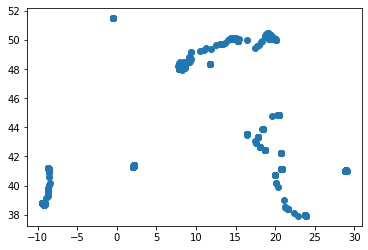

In [4]:
plt.scatter(df.iloc[:,1], df.iloc[:,0])
plt.show()

# Zad.

Narysuj dane na mapie.

https://rabernat.github.io/research_computing/intro-to-basemap.html

Jeśli nie działa

  * conda install basemap

to można spróbować:

  * conda install -c conda-forge basemap
  
http://www.datadependence.com/2016/06/creating-map-visualisations-in-python/  


In [5]:
# !set "PROJ_LIB=C:\Users\admin\anaconda3\Library\share

In [6]:
#ubuntu
#https://stackoverflow.com/questions/60164560/attributeerror-series-object-has-no-attribute-as-matrix-why-is-it-error
#windows
#https://stackoverflow.com/questions/52911232/basemap-library-using-anaconda-jupyter-notebooks-keyerror-proj-lib/54087410#54087410

import os

os.environ['PROJ_LIB'] = r'C:\Users\admin\anaconda3\pkgs\proj4-5.2.0-ha925a31_1\Library\share'


In [7]:
from mpl_toolkits.basemap import Basemap

In [8]:
#https://gist.github.com/junzis/36fee36acd7cadfdf1c01c06d97f4947
#!conda install -c conda-forge basemap-data-hires

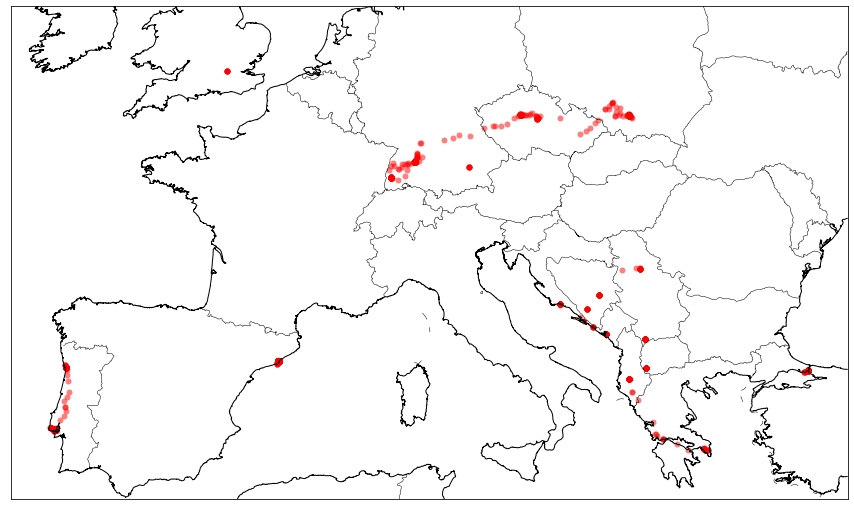

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

lat = df['lat'].values
lon = df['lon'].values

# determine range to print based on min, max lat and lon of the data
margin = 2 # buffer to add to the range
lat_min = min(lat) - margin
lat_max = max(lat) + margin
lon_min = min(lon) - margin
lon_max = max(lon) + margin

plt.subplots(num=None, figsize=(15, 10))

# # create map using BASEMAP
m = Basemap(llcrnrlon=lon_min,
            llcrnrlat=lat_min,
            urcrnrlon=lon_max,
            urcrnrlat=lat_max,
            lat_0=(lat_max - lat_min)/2,
            lon_0=(lon_max-lon_min)/2,
            projection='merc',
            resolution = 'h',
            area_thresh=10000.,
            )
m.drawcoastlines()
m.drawcountries()
m.drawstates()


# convert lat and lon to map projection coordinates
lons, lats = m(lon, lat)
# plot points as red dots
m.scatter(lons, lats, marker = 'o', color='r', alpha=0.5, linewidth=0)
plt.show()

# Zad. 

* Wykonaj klastrowanie DBSCAN tak aby grupy pokazały miejsca gdzie najczęściej przebywał podróżnik.
* Elementy odstające zaznacz szarym odcieniem
* pokoloruj każdy klaster innym kolorem

In [10]:
# represent points consistently as (lat, lon)
coords = df[['lat', 'lon']].to_numpy()

# define the number of kilometers in one radian
kms_per_radian = 6371.0088

# define epsilon as 10 kilometers, converted to radians for use by haversine
epsilon = 10 / kms_per_radian

In [11]:
start_time = time.time()
db = DBSCAN(eps=epsilon, min_samples=10, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))
cluster_labels = db.labels_
unique_labels = set(cluster_labels)

# get the number of clusters
num_clusters = len(set(cluster_labels))
print(num_clusters)
print(unique_labels)

18
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, -1}


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

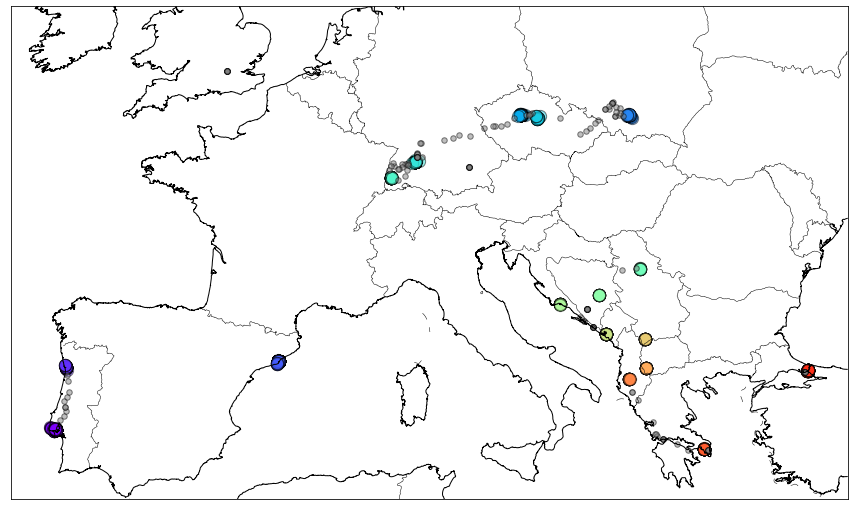

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

lat = df['lat'].values
lon = df['lon'].values

# determine range to print based on min, max lat and lon of the data
margin = 2 # buffer to add to the range
lat_min = min(lat) - margin
lat_max = max(lat) + margin
lon_min = min(lon) - margin
lon_max = max(lon) + margin

plt.subplots(num=None, figsize=(15, 10))

# # create map using BASEMAP
m = Basemap(llcrnrlon=lon_min,
            llcrnrlat=lat_min,
            urcrnrlon=lon_max,
            urcrnrlat=lat_max,
            lat_0=(lat_max - lat_min)/2,
            lon_0=(lon_max-lon_min)/2,
            projection='merc',
            resolution = 'h',
            area_thresh=10000.,
            )
m.drawcoastlines()
m.drawcountries()
m.drawstates()


colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))

# for each cluster label and color, plot the cluster's points
for cluster_label, color in zip(unique_labels, colors):
    
    size = 150
    if cluster_label == -1: #make the noise (which is labeled -1) appear as smaller gray points
        color = 'gray'
        size = 30
    
    # plot the points that match the current cluster label
    x_coords = coords[cluster_labels==cluster_label][:,1]
    y_coords = coords[cluster_labels==cluster_label][:,0]
    lons, lats = m(x_coords, y_coords)
    m.scatter(lons, lats, c=color, edgecolor='k', s=size, alpha=0.5)

plt.show()

In [36]:
coefficient = metrics.silhouette_score(coords, cluster_labels)
print('Silhouette coefficient: {:0.03f}'.format(metrics.silhouette_score(coords, cluster_labels)))

Silhouette coefficient: 0.854


# Zad. 

Za pomocą DBSCAN zrobiće ładną wizualizację

- uwzględnić, gdzie nasz podróżnik przebywał długo (zlokalizować te miejsca na podstawie danych GPS i przedstawić jako JEDEN PUNKT, uwzględnić w wizualizacji czas przebywania w danym miejscu).

In [37]:
df["cluster"] = cluster_labels

C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:25: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:28: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:29: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


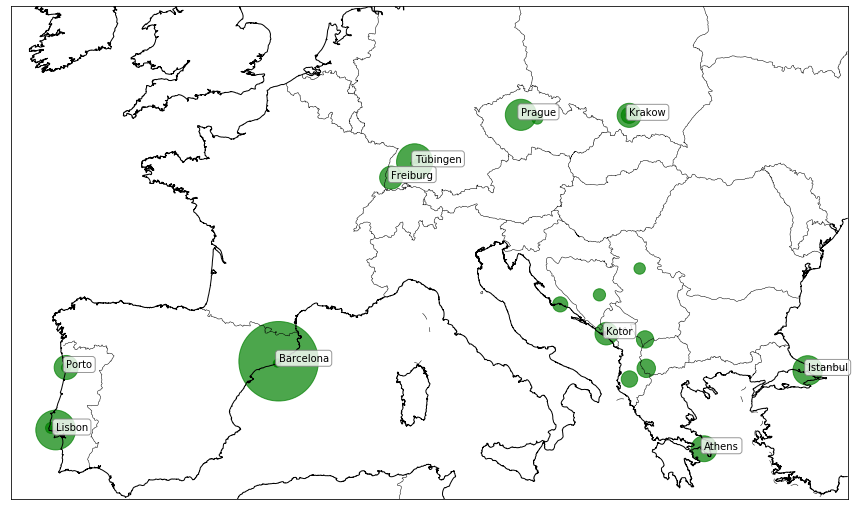

In [38]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

lat = df['lat'].values
lon = df['lon'].values

# determine range to print based on min, max lat and lon of the data
margin = 2 # buffer to add to the range
lat_min = min(lat) - margin
lat_max = max(lat) + margin
lon_min = min(lon) - margin
lon_max = max(lon) + margin

plt.subplots(num=None, figsize=(15, 10))

# # create map using BASEMAP
m = Basemap(llcrnrlon=lon_min,
            llcrnrlat=lat_min,
            urcrnrlon=lon_max,
            urcrnrlat=lat_max,
            lat_0=(lat_max - lat_min)/2,
            lon_0=(lon_max-lon_min)/2,
            projection='merc',
            resolution = 'h',
            area_thresh=10000.,
            )
m.drawcoastlines()
m.drawcountries()
m.drawstates()


colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))


def f(x):
    x['n'] = len(x)
    return x

centers = df.loc[:,["lat","lon","cluster","city"]].loc[df.cluster != -1].groupby(["city"]).apply(f)
centers = centers.groupby(["cluster","city"]).agg({"lat":np.mean,"lon":np.mean,"n":np.median}).reset_index()

lons, lats = m(centers.lon.values, centers.lat.values)
m.scatter(lons, lats,s=10*centers.n,c="green",alpha=0.7)

for i, row in centers.iterrows():
    
    if row.n < 50:
        continue
    lons1, lats1 = m(row['lon'], row['lat'])    
    plt.annotate(row['city'],
        xy=(lons1, lats1),
        xytext=(lons1 + 0.5, lats1 - 1),
         #size=10,   
        bbox=dict(boxstyle='round', color='gray', fc='w', alpha=0.8),
        #xycoords='data'
    )

plt.show()

# Klastrowanie w celu zmniejszenia rozmiaru zbioru danych

 * Zamiast klastrować w celu wykrycia grup można uzyć takiego podejścia by zmniejszyć rozmiar zbioru danych. 

 * Nawet w bardzo bliskim sąsiedztwie, kilka lokalizacji zawiera setki punktów danych ułożonych bezpośrednio jeden na drugim ze względu na czas spędzony w jednym miejscu. 

 * Jeśli nie interesuje nas dynamika czasu, po prostu nie potrzebujemy wszystkich punktów.
 
 # Zad.
 Wygeneruj nową tabelę zawieralącą dokładnie takie same kolumny ale usuwajac elementy odstające.

In [39]:
# set eps low (1.5km) so clusters are only formed by very close points
epsilon = 1.5 / kms_per_radian

# set min_samples to 1 so we get no noise - every point will be in a cluster even if it's a cluster of 1
start_time = time.time()
db = DBSCAN(eps=epsilon, min_samples=1, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))
cluster_labels = db.labels_
unique_labels = set(cluster_labels)

# get the number of clusters
num_clusters = len(set(cluster_labels))

# all done, print the outcome
message = 'Clustered {:,} points down to {:,} clusters, for {:.1f}% compression in {:,.2f} seconds'
print(message.format(len(df), num_clusters, 100*(1 - float(num_clusters) / len(df)), time.time()-start_time))

Clustered 1,759 points down to 138 clusters, for 92.2% compression in 0.19 seconds


In [40]:
coefficient = metrics.silhouette_score(coords, cluster_labels)
print('Silhouette coefficient: {:0.03f}'.format(metrics.silhouette_score(coords, cluster_labels)))

Silhouette coefficient: 0.652


In [41]:
# number of clusters, ignoring noise if present
num_clusters = len(set(cluster_labels)) #- (1 if -1 in labels else 0)
print('Number of clusters: {}'.format(num_clusters))

Number of clusters: 138


In [42]:
# create a series to contain the clusters - each element in the series is the points that compose each cluster
clusters = pd.Series([coords[cluster_labels == n] for n in range(num_clusters)])
clusters.tail()

133    [[37.933989399999994, 23.9458449], [37.9339127...
134    [[40.9823519, 28.815756099999998], [40.9764857...
135    [[41.0016292, 28.949190500000004], [41.0402122...
136    [[41.01496289999999, 29.010762100000004], [41....
137    [[48.3564169, 11.7921547], [48.356012799999995...
dtype: object

In [43]:
np.sort(clusters[3], axis=0)[len(clusters[3])//2]

array([38.7118706, -9.1373236])

In [44]:
a = np.array([[1,4],[3,1]])

sorted(a, key=lambda a_entry: a_entry[1])     # sort along the first axis
a

array([[1, 4],
       [3, 1]])

In [45]:
# given a cluster of points, return the point nearest to the cluster's centroid
def get_centermost_point(cluster):
    sorted(cluster, key=lambda a_entry: a_entry[1]) 
    centroid =  cluster[len(cluster)//2]
     #(MultiPoint(cluster).centroid.x, MultiPoint(cluster).centroid.y)
    #centermost_point = min(cluster, key=lambda point: great_circle(point, centroid).m)
    #return tuple(centermost_point)
    return(centroid)

In [46]:
# find the point in each cluster that is closest to its centroid
centermost_points = clusters.map(get_centermost_point)

# unzip the list of centermost points (lat, lon) tuples into separate lat and lon lists
lats, lons = zip(*centermost_points)

# from these lats/lons create a new df of one representative point for each cluster
representative_points = pd.DataFrame({'lon':lons, 'lat':lats})
representative_points.tail()

,lon,lat
133,23.945677,37.933814
134,28.820527,40.980462
135,28.985431,41.043456
136,29.011215,41.014247
137,11.791710,48.356285


In [47]:
# pull row from full data set (df) where lat/lon match the lat/lon of each row of representative points
# use iloc[0] to pull just the first row if there are multiple matches
rs = representative_points.apply(lambda row: df[(df['lat']==row['lat']) & (df['lon']==row['lon'])].iloc[0], axis=1)
rs.tail()

,lat,lon,date,city,country,cluster
133,37.933814,23.945677,07/06/2014 17:57,Attica,Greece,-1
134,40.980462,28.820527,07/06/2014 21:27,Istanbul,Turkey,-1
135,41.043456,28.985431,07/07/2014 21:15,Istanbul,Turkey,16
136,41.014247,29.011215,07/07/2014 17:43,Istanbul,Turkey,16
137,48.356285,11.791710,07/09/2014 13:17,Munich,Germany,-1


C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:25: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:28: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:29: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


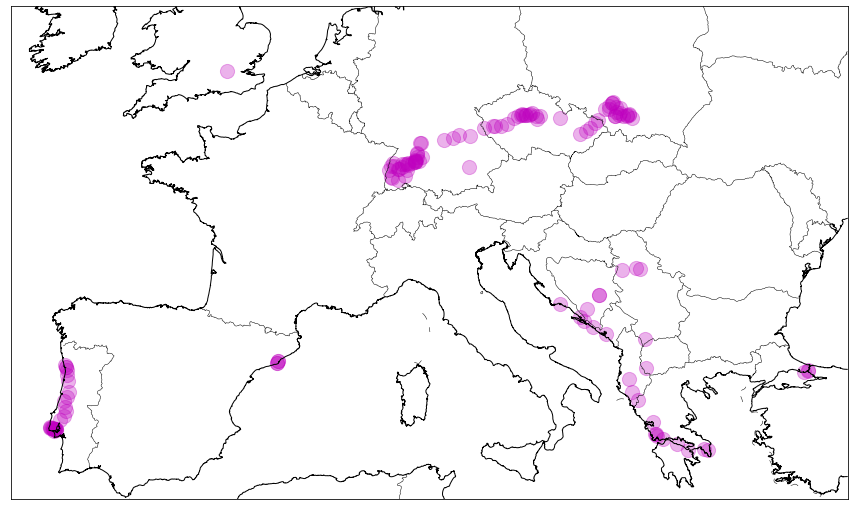

In [48]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

lat = df['lat'].values
lon = df['lon'].values

# determine range to print based on min, max lat and lon of the data
margin = 2 # buffer to add to the range
lat_min = min(lat) - margin
lat_max = max(lat) + margin
lon_min = min(lon) - margin
lon_max = max(lon) + margin

plt.subplots(num=None, figsize=(15, 10))

# # create map using BASEMAP
m = Basemap(llcrnrlon=lon_min,
            llcrnrlat=lat_min,
            urcrnrlon=lon_max,
            urcrnrlat=lat_max,
            lat_0=(lat_max - lat_min)/2,
            lon_0=(lon_max-lon_min)/2,
            projection='merc',
            resolution = 'h',
            area_thresh=10000.,
            )
m.drawcoastlines()
m.drawcountries()
m.drawstates()

lons1, lats1 = m(rs['lon'].values, rs['lat'].values)
lons2, lats2 = m(df['lon'].values, df['lat'].values)

m.scatter(lons1, lats1, c='m', alpha=0.3, s=200)

plt.show()

C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:25: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:28: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:29: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


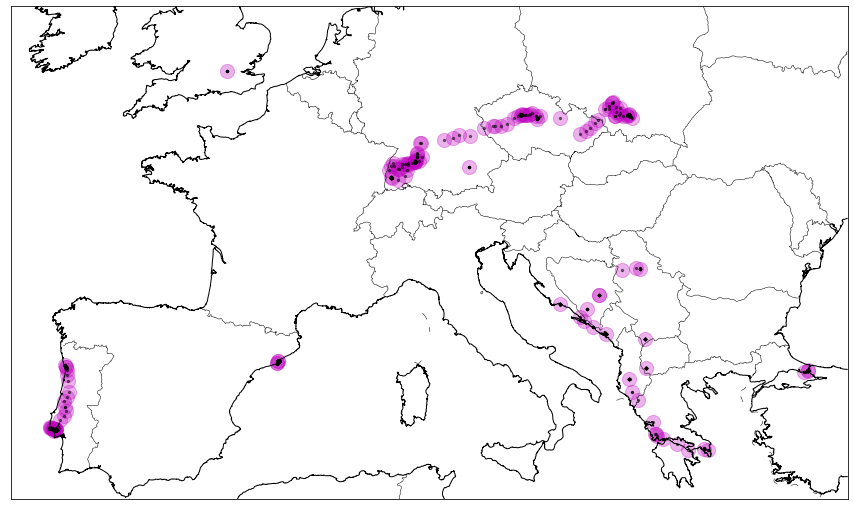

In [49]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

lat = df['lat'].values
lon = df['lon'].values

# determine range to print based on min, max lat and lon of the data
margin = 2 # buffer to add to the range
lat_min = min(lat) - margin
lat_max = max(lat) + margin
lon_min = min(lon) - margin
lon_max = max(lon) + margin

plt.subplots(num=None, figsize=(15, 10))

# # create map using BASEMAP
m = Basemap(llcrnrlon=lon_min,
            llcrnrlat=lat_min,
            urcrnrlon=lon_max,
            urcrnrlat=lat_max,
            lat_0=(lat_max - lat_min)/2,
            lon_0=(lon_max-lon_min)/2,
            projection='merc',
            resolution = 'h',
            area_thresh=10000.,
            )
m.drawcoastlines()
m.drawcountries()
m.drawstates()

lons1, lats1 = m(rs['lon'].values, rs['lat'].values)
lons2, lats2 = m(df['lon'].values, df['lat'].values)

m.scatter(lons1, lats1, c='m', alpha=0.3, s=200)
m.scatter(lons2, lats2, c='k', alpha=0.5, s=5)

plt.show()